### DS7337 NLP - HW 1 & 2
#### David Wei

# Homework 1

1.Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine. [book link](http://www.nltk.org/book/)

2.Go to http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf), and obtain three texts (of different grade levels) from the “Graded Readers” section. Report the lexical diversity score of each. Explain whether the result was surprising.

3.Also compare the vocabulary size of the same three texts. Explain whether the result was surprising. 

4.Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.


### Identifying Text to Analyze

<u>**3 text levels:**</u>
- 3rd: [The Project Gutenberg EBook of McGuffey's Third Eclectic Reader](https://www.gutenberg.org/cache/epub/14766/pg14766.txt)
- 5th: [The Project Gutenberg EBook of McGuffey's Fifth Eclectic Reader](https://www.gutenberg.org/cache/epub/15040/pg15040.txt)
- 7th: [The Literary World Seventh Reader by Browne, Metcalf, and Withers](http://www.gutenberg.org/ebooks/19721)

### Importing and Creating Text Objects

In [1]:
import nltk
from urllib import request
import matplotlib as plt
import os
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.preprocessing import minmax_scale
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

In [20]:
#3rd|
text1_url = "https://www.gutenberg.org/cache/epub/14766/pg14766.txt"
#5th
text2_url = "https://www.gutenberg.org/cache/epub/15040/pg15040.txt"
#7th
text3_url = "https://www.gutenberg.org/cache/epub/19721/pg19721.txt"

#combined
text_urls = ["https://www.gutenberg.org/cache/epub/14766/pg14766.txt",
            "https://www.gutenberg.org/cache/epub/15040/pg15040.txt",
            "https://www.gutenberg.org/cache/epub/19721/pg19721.txt",]

# reads in electronic book
def getRaw(text):
    url = text
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    normalized_text = raw.lower()
    raw_character_count = len(raw)
    return raw, raw_character_count, normalized_text

# gets the title of book by searching for each group based on the 'Title:' keyword
def getTitle(text):
    raw = getRaw(text)[0]
    search_title = re.search('Title:(.*)', raw) #finds entire group
    title = search_title.group(1).replace("\r", ' ').strip()
    return title

# converts token into NLKT text object for linguistic processing
def getNLKTText(text):
    raw = getRaw(text)[2]
    # tokenization to break up string into words and punctuation
    tokens = word_tokenize(raw)
    text = nltk.Text(tokens)
    return text

### Finding Lexical Diversity & Vocabulary Size

What is lexical diversity? Lexical words are words such as nouns, adjectives, verbs, and adverbs that convey meaning in a text. They’re the words that you’d expect a child to use when first learning to speak. For example, ‘cat’ ‘play’ and ‘red’. [Source](https://textinspector.com/help/lexical-diversity/#:~:text=What%20is%20Lexical%20Diversity%3F,convey%20meaning%20in%20a%20text.)

In [21]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return word_count, vocab_size, diversity_score

In [22]:
%%time
# create empty list to store text lexical diversity summaries
lexical_diversity_total = []
raw_counts = []
book_titles = []

# loop through each text url, convert to NLKT text object format and then create lexical summary
for url in text_urls:
    nlkt_text = getNLKTText(url)
    # retrivies original raw string count
    raw_count = getRaw(url)[1]
    # retrieves book title
    book_title = getTitle(url)
    lexical_summary = list(lexical_diversity(nlkt_text))
    
    # append to empty lexical diversity summary
    lexical_diversity_total.append(lexical_summary)
    # appends original raw count
    raw_counts.append(raw_count)
    # append to empty book title 
    book_titles.append(book_title)
    
print(lexical_diversity_total)
print('='*80)
print(raw_counts)
print('='*80)
print(book_titles)

[[37398, 4148, 0.1109150221937002], [125052, 12442, 0.09949461024213926], [128400, 11939, 0.09298286604361371]]
[168159, 605278, 621668]
["McGuffey's Third Eclectic Reader", "McGuffey's Fifth Eclectic Reader", 'The Literary World Seventh Reader']
Wall time: 48.9 s


In [23]:
import pandas as pd

#create df from list
lexical_diversity_total_df = pd.DataFrame(lexical_diversity_total, 
                                            columns=['tokenized_word_count', 'vocab_size', 'diversity_score'])
raw_counts_df = pd.DataFrame(raw_counts, columns=['raw_word_count'])
book_title_df = pd.DataFrame(book_titles, columns=['book_title'])

print(lexical_diversity_total_df)
print(book_title_df)
print('='*80)

#join in our book names
final_df_list = [book_title_df, raw_counts_df, lexical_diversity_total_df]
lexical_summary_df = pd.concat(final_df_list,axis=1)
print(lexical_summary_df)

   tokenized_word_count  vocab_size  diversity_score
0                 37398        4148         0.110915
1                125052       12442         0.099495
2                128400       11939         0.092983
                          book_title
0   McGuffey's Third Eclectic Reader
1   McGuffey's Fifth Eclectic Reader
2  The Literary World Seventh Reader
                          book_title  raw_word_count  tokenized_word_count  \
0   McGuffey's Third Eclectic Reader          168159                 37398   
1   McGuffey's Fifth Eclectic Reader          605278                125052   
2  The Literary World Seventh Reader          621668                128400   

   vocab_size  diversity_score  
0        4148         0.110915  
1       12442         0.099495  
2       11939         0.092983  


#### Finding correlation between the raw_word_count and the vocabulary size

In [24]:
lexical_summary_df['raw_word_count'].corr(lexical_summary_df['vocab_size'])

0.9963064745407576

#### Finding correlation between the tokenized vocabulary size and it's lexical diversity

In [25]:
lexical_summary_df['vocab_size'].corr(lexical_summary_df['diversity_score'])

-0.9126951623945646

Text(0.5, 1.0, 'Fig 1. Corr Vocab_Size vs Lex_Diversity')

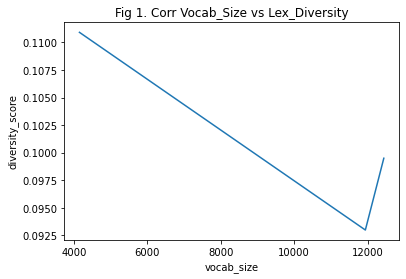

In [26]:
import seaborn as sns
sns.lineplot(data=lexical_summary_df, x="vocab_size", y="diversity_score").set_title('Fig 1. Corr Vocab_Size vs Lex_Diversity')

We can see that interestingly, the more "advanced" the text books (comparing 3rd grade books to 7th grade books") becomes, the less diverse the vocabulary actually gets. This phenomenon has actually been researched ([Source](https://lps.library.cmu.edu/LDR/article/id/77/)) and found that the lexical richness found in children's books is actually very strong in terms of the use of verbs whereas books directed towards an older audience (7th grade) is more abstract in the uses of entities rather words.

There is also a very clear distinction separate from lexical diversity that shows an increase in the vocabulary size as the grade level of the books increases. Finding the correlation between the **raw_word_count** which provides us a pre-tokenzed version of the text and the tokenized version of the **vocab_size provides** a very high correaltion (.98) demonstrating that the two share a strong relationship. However, we can see that though the raw_word_count increases, the tokenized vocab_size actually increase then decreases from 5th to 7th grade suggesting a non-linear relationship between the vocab_size and the text's lexical diversity.

Now that the relationship between vocabulary size (tokenized) and the lexical diversity has been established, we want to answer the question: does vocab size and lexical diveristy measure text difficulty better individually or together holistically? From the evidence, we can see that the two attributes have a relationship but one that isn't strong enough to omit one or the other entirely as a measurement of text difficulty. Given the non-linear relationship we can visually observe in Fig 1., I'd argue that to measure text difficulty, it's best to use both of these properties of text together. 

# Homework 2

<u>**HW 2:**</u>

1. In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)

2.	After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

3.	Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting (averages). Explain what you see when this score is applied to same graded texts you used in homework 1.

### Defining "long-word vocabulary" 
Using our prior work, we will first re-define what **"long-word"** vocabulary is for clarity. Recalling some of our earlier built function attributes, long-word is equivalent of what we defined as **vocab_size** which contains the tokenized version of the text, including all unique words found in the corpora. 

#### Example long-word vocab using text1 (The Project Gutenberg EBook of McGuffey's Third Eclectic Reader)

In [27]:
example_long_word_vocab = set(getNLKTText(text1_url))
print(example_long_word_vocab)

 'faded', 'clime', 'figure', 'letters', 'blood', 'complying', 'quantity', 'feet', 'encountered', 'especially', 'house', 'shelter', 'woe', 'warrior', 'sorrowfully', 'into', 'v.', 'frank', 'berries', 'hyphen', 'rosy-red', "'", 'prefer', 'scenes', 'tray', 'tail', 'beginning', 'herself', 'cares', 'violates', 'computers', 'against', 'done', 'rubbed', 'comply', 'colophon', '29', 'echo', 'master', '139', 'sod', '196', 'travels', 'corrupt', 'coarse-looking', "'d", 'denotes', 'blossom', 'terrier', 'teased', 'xliii', 'boy', 'constructed', '155', 'different', 'whit', 'sprang', 'bayonet', 'commercial', 'supposing', 'doubt', 'cotton', 'gingerbread', 'crack', 'fragrant', 'feel', 'united', 'surrender', 'i.', 'back', 'river', 'sleeves', 'ninepins', 'unto', 'humming', 'hunted', '185', 'street', 'corner', 'taken', 'forgotten', 'roof', 'ak', '1.f.6', 'possessed', 'be-cause', 'bravely', 'sudden', '10.', '46.', '36.', 'ship', 'apart', 'whom', 'years', '//www.pglaf.org', 'flew', 'roused', 'own', 'say', 'dra

### Normalizing Text - Convert to Lowercase

We will first normalize the entire corpora text by normalizing all text to the lower-case format. This is important so that cases where the same word with varying levels of capitalization is removed (ex. "The" vs "the") which will as a result, provide greater vocab_size accuracy. This will be applied to our original getRaw function that will take raw text and then apply a lower() function.

<code>
def getRaw(text):
    url = text
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    normalized_text = raw.lower()
    raw_character_count = len(raw)
    return raw, raw_character_count, normalized_text </code>

### Normalizing Text Vocabulary Size

To extract the vocabulary size, we will resort back to the second argument of the prior predefined function **lexical_diversity_total** which gives us the vocabulary size. Using the vocabulary_size, we will normalize them on a minmax scale. Finally once normalized, we will add it back to the overall summary dataframe (lexical_summary_df).

In [28]:
# original list storing word_count, vocab_size, diversity_score
lexical_diversity_total
print(lexical_diversity_total)
print('\n')

# convert list to numpy array to slice
np.set_printoptions(suppress=True)
lexical_diversity_total_np = np.asarray(lexical_diversity_total,dtype=np.float32)
print(lexical_diversity_total_np)
print('\n')

# selecting only vocab_size index
print(lexical_diversity_total_np[:,1])
print('\n')

# normalizing the vocab_size 
vocab_size_norm = minmax_scale(lexical_diversity_total_np[:,1], feature_range=(0,1), axis=0)
print(vocab_size_norm)
print('-'*100)
# convert to df
vocab_size_df = pd.DataFrame(vocab_size_norm, columns=['long_vocab_size_normalized'])
print(vocab_size_df)
print('-'*100)
# join back to summary_df
lexical_summary_df = pd.concat([lexical_summary_df, vocab_size_df],axis=1)
print(lexical_summary_df)

[[37398, 4148, 0.1109150221937002], [125052, 12442, 0.09949461024213926], [128400, 11939, 0.09298286604361371]]


[[ 37398.           4148.              0.11091502]
 [125052.          12442.              0.09949461]
 [128400.          11939.              0.09298287]]


[ 4148. 12442. 11939.]


[0.         0.99999994 0.93935376]
----------------------------------------------------------------------------------------------------
   long_vocab_size_normalized
0                    0.000000
1                    1.000000
2                    0.939354
----------------------------------------------------------------------------------------------------
                          book_title  raw_word_count  tokenized_word_count  \
0   McGuffey's Third Eclectic Reader          168159                 37398   
1   McGuffey's Fifth Eclectic Reader          605278                125052   
2  The Literary World Seventh Reader          621668                128400   

   vocab_size  diversity_score  lon

### Creating “text difficulty score”

To create a text difficulty score, we will average the long-word vocabulary size (vocab_size), the diversity_score and lastly our normalized long_vocab_size. 

In [29]:
avg_cols = ['vocab_size', 'diversity_score', 'long_vocab_size_normalized']
lexical_summary_df['text_difficulty_score'] = lexical_summary_df[avg_cols].astype(float).mean(axis=1)
print(lexical_summary_df)

                          book_title  raw_word_count  tokenized_word_count  \
0   McGuffey's Third Eclectic Reader          168159                 37398   
1   McGuffey's Fifth Eclectic Reader          605278                125052   
2  The Literary World Seventh Reader          621668                128400   

   vocab_size  diversity_score  long_vocab_size_normalized  \
0        4148         0.110915                    0.000000   
1       12442         0.099495                    1.000000   
2       11939         0.092983                    0.939354   

   text_difficulty_score  
0            1382.703638  
1            4147.699832  
2            3980.010779  


In [30]:
lexical_summary_df['vocab_size'].corr(lexical_summary_df['text_difficulty_score'])

0.999999999999682

We can see that our hypothesis from using only either diversity_score or vocab_size as a measure of evaluating text difficulty was correct in that combining these attributes together provides a much clearer picture on measuring the difficulty of text. We can see that alone, the normalized version of our vocab_size shows us how insignificant 3rd grade vocab_size is compared to it's 5th and 7th grade counterparts. However as stated prior, the diversity_score shows us that though the vocab_size of 3rd grade text is significantly smaller, it's diversity_score is higher meaning that though the text is low in vocab_size it is rich word uniquness. Holistically, we can evaluate the overall difficulty of the text by seeing that 5th grade text is most difficult in terms of the amount of words used as well as the uniquness of those words.  